# Coldmap automation

The goal of this notebook is to automatically generate the coldmaps for each path in the dataset.

In [1]:
import os
import glob
import importlib
import dataset_lib
importlib.reload(dataset_lib)
from dataset_lib import *

In [2]:
input_path = "img/cmap/map1_path_thin.png"
output_path = "img/cmap/map1_path_thin_tmp5.png"
coords = get_nearest_coords(input_path, process_rows2)
coldmap = coords_to_coldmap(coords, threshold=20, exponent=1.25, normalize=255)
save_coldmap_png(coldmap, output_path)

Processing img/cmap/map1_path_thin.png
Coldmap generated.
Coldmap saved to img/cmap/map1_path_thin_tmp5.png


In [31]:
path_line1 = "./dataset/intersection_002/paths/path_1/"
path_line2 = "./dataset/intersection_002/paths/path_2/"
path_line3 = "./dataset/intersection_001/paths/path_3/"

paths = [path_line1, path_line2, path_line3]

print(paths)

['./dataset/intersection_002/paths/path_1/', './dataset/intersection_002/paths/path_2/', './dataset/intersection_001/paths/path_3/']


In [2]:
import glob

paths_test = glob.glob('./dataset/test/*/paths/*/')
paths_train = glob.glob('./dataset/train/*/paths/*/')
paths = paths_test + paths_train
print(paths)

['./dataset/test/intersection_001/paths/path_1/', './dataset/test/intersection_001/paths/path_2/', './dataset/test/intersection_001/paths/path_3/', './dataset/test/intersection_002/paths/path_1/', './dataset/test/intersection_002/paths/path_2/', './dataset/test/intersection_003/paths/path_1/', './dataset/test/intersection_003/paths/path_2/', './dataset/test/intersection_004/paths/path_1/', './dataset/test/intersection_004/paths/path_2/', './dataset/test/intersection_005/paths/path_1/', './dataset/test/intersection_005/paths/path_2/', './dataset/test/intersection_006/paths/path_1/', './dataset/test/intersection_006/paths/path_2/', './dataset/test/intersection_006/paths/path_3/', './dataset/test/intersection_007/paths/path_1/', './dataset/test/intersection_007/paths/path_2/', './dataset/test/intersection_008/paths/path_1/', './dataset/test/intersection_008/paths/path_2/', './dataset/test/intersection_009/paths/path_1/', './dataset/test/intersection_009/paths/path_2/', './dataset/test/int

In [3]:
paths = glob.glob('./dataset/train/*/paths/*/')
print(paths) 

r = range(113, 904+1)
r = [f"{i:03d}" for i in r]
print(r)
new_paths = [p for p in paths if any(sub in p for sub in r)]
print(new_paths)

['./dataset/train/intersection_001/paths/path_1/', './dataset/train/intersection_001/paths/path_2/', './dataset/train/intersection_001/paths/path_3/', './dataset/train/intersection_002/paths/path_1/', './dataset/train/intersection_002/paths/path_2/', './dataset/train/intersection_003/paths/path_1/', './dataset/train/intersection_003/paths/path_2/', './dataset/train/intersection_003/paths/path_3/', './dataset/train/intersection_004/paths/path_1/', './dataset/train/intersection_004/paths/path_2/', './dataset/train/intersection_004/paths/path_3/', './dataset/train/intersection_005/paths/path_1/', './dataset/train/intersection_005/paths/path_2/', './dataset/train/intersection_005/paths/path_3/', './dataset/train/intersection_006/paths/path_1/', './dataset/train/intersection_006/paths/path_2/', './dataset/train/intersection_006/paths/path_3/', './dataset/train/intersection_007/paths/path_1/', './dataset/train/intersection_007/paths/path_2/', './dataset/train/intersection_007/paths/path_3/',

In [ ]:
for path in new_paths: 
    path = os.path.join(path, "path_line.png")
    coords = get_nearest_coords(path, process_rows2)
    
    coldmap = coords_to_coldmap(coords, threshold=20, exponent=0.5, normalize=1)
    
    dir_name = os.path.dirname(path)
    out_file = os.path.join(dir_name, "cold_map.png")
    
    out_file_npy = os.path.join(dir_name, "cold_map")
    
    save_coldmap_npy(coldmap, out_file_npy)

Processing ./dataset/train/intersection_113/paths/path_1/path_line.png
Coldmap generated.
Coldmap saved to ./dataset/train/intersection_113/paths/path_1/cold_map.npy
Processing ./dataset/train/intersection_113/paths/path_2/path_line.png
Coldmap generated.
Coldmap saved to ./dataset/train/intersection_113/paths/path_2/cold_map.npy
Processing ./dataset/train/intersection_114/paths/path_1/path_line.png
Coldmap generated.
Coldmap saved to ./dataset/train/intersection_114/paths/path_1/cold_map.npy
Processing ./dataset/train/intersection_114/paths/path_2/path_line.png
Coldmap generated.
Coldmap saved to ./dataset/train/intersection_114/paths/path_2/cold_map.npy
Processing ./dataset/train/intersection_115/paths/path_1/path_line.png
Coldmap generated.
Coldmap saved to ./dataset/train/intersection_115/paths/path_1/cold_map.npy
Processing ./dataset/train/intersection_115/paths/path_2/path_line.png
Coldmap generated.
Coldmap saved to ./dataset/train/intersection_115/paths/path_2/cold_map.npy
Proc

In [14]:
import cv2
import numpy as np

coldmap1: np.ndarray = np.load("./dataset/intersection_001/paths/path_3/cold_map.npy")
print(f"Cold is type: {type(coldmap1)} ({coldmap1.dtype}), with max: {coldmap1.max()}, min: {coldmap1.min()}, avg: {coldmap1.mean()}")

cv2.imshow("coldmap1", coldmap1)
cv2.waitKey(0)
cv2.destroyAllWindows()

Cold is type: <class 'numpy.ndarray'> (float32), with max: 1.0, min: 0.0, avg: 0.36545416712760925


In [4]:
class_label_paths_test = glob.glob('./dataset/test/intersection_*/class_labels.npy')
class_label_paths_train = glob.glob('./dataset/train/intersection_*/class_labels.npy')
class_label_paths = class_label_paths_test + class_label_paths_train
print(len(class_label_paths))
print(class_label_paths[:-5])


936
['./dataset/test/intersection_001/class_labels.npy', './dataset/test/intersection_002/class_labels.npy', './dataset/test/intersection_003/class_labels.npy', './dataset/test/intersection_004/class_labels.npy', './dataset/test/intersection_005/class_labels.npy', './dataset/test/intersection_006/class_labels.npy', './dataset/test/intersection_007/class_labels.npy', './dataset/test/intersection_008/class_labels.npy', './dataset/test/intersection_009/class_labels.npy', './dataset/test/intersection_010/class_labels.npy', './dataset/test/intersection_011/class_labels.npy', './dataset/test/intersection_012/class_labels.npy', './dataset/test/intersection_013/class_labels.npy', './dataset/test/intersection_014/class_labels.npy', './dataset/test/intersection_015/class_labels.npy', './dataset/test/intersection_016/class_labels.npy', './dataset/test/intersection_017/class_labels.npy', './dataset/test/intersection_018/class_labels.npy', './dataset/test/intersection_019/class_labels.npy', './data

In [3]:
class_label_paths_test = glob.glob('./dataset/test/intersection_*/class_labels.npy')
class_label_paths_train = glob.glob('./dataset/train/intersection_*/class_labels.npy')
class_label_paths = class_label_paths_test + class_label_paths_train

for path in class_label_paths:
    coords = get_nearest_coords_npy(path, process_rows2)
    
    coldmap = coords_to_coldmap(coords, threshold=10, exponent=0.5, normalize=1)
    
    dir_name = os.path.dirname(path)
    out_file_npy = os.path.join(dir_name, "class_label_cold_map")
    
    save_coldmap_npy(coldmap, out_file_npy)

Processing ./dataset/test/intersection_001/class_labels.npy
Coldmap generated.
Coldmap saved to ./dataset/test/intersection_001/class_label_cold_map.npy
Processing ./dataset/test/intersection_002/class_labels.npy
Coldmap generated.
Coldmap saved to ./dataset/test/intersection_002/class_label_cold_map.npy
Processing ./dataset/test/intersection_003/class_labels.npy
Coldmap generated.
Coldmap saved to ./dataset/test/intersection_003/class_label_cold_map.npy
Processing ./dataset/test/intersection_004/class_labels.npy
Coldmap generated.
Coldmap saved to ./dataset/test/intersection_004/class_label_cold_map.npy
Processing ./dataset/test/intersection_005/class_labels.npy
Coldmap generated.
Coldmap saved to ./dataset/test/intersection_005/class_label_cold_map.npy
Processing ./dataset/test/intersection_006/class_labels.npy
Coldmap generated.
Coldmap saved to ./dataset/test/intersection_006/class_label_cold_map.npy
Processing ./dataset/test/intersection_007/class_labels.npy
Coldmap generated.
Col

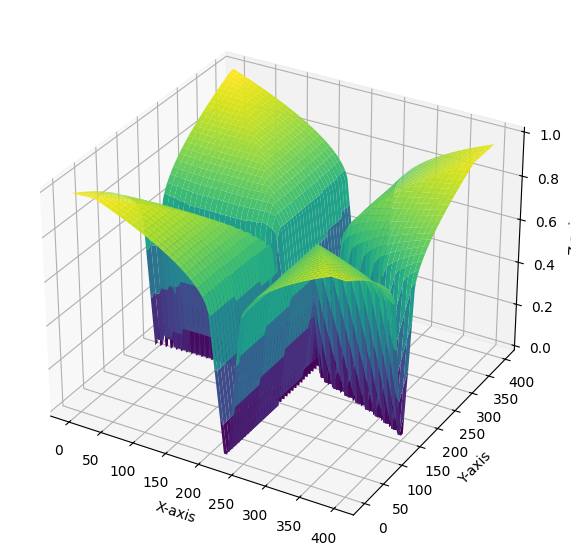

In [2]:

import matplotlib.pyplot as plt
cmap = np.load("./dataset/train/intersection_001/class_label_cold_map.npy")

x = np.arange(cmap.shape[1])
y = np.arange(cmap.shape[0])
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, cmap, cmap='viridis')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()